# EfficientNet Implementation   - EfficientNet- B0

## Training a Custom  Model from scratch

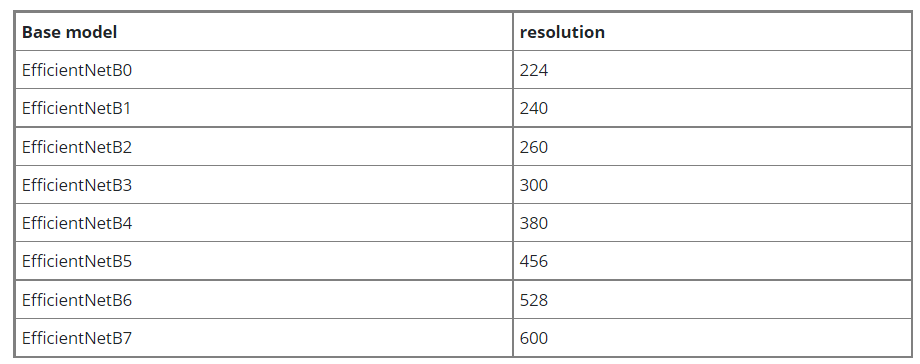

# Data Pre Processing

In [1]:
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

dataset_path = os.listdir('dataset')

print (dataset_path)  #what kinds of classes are in this dataset

print("Types of classes labels found: ", len(dataset_path))

['foot-ulcers', 'Infected-necrotic-toes', 'leg-ulcer-images-venous-ulcer', 'pressure-ulcers-combine']
Types of classes labels found:  4


In [2]:
class_labels = []

for item in dataset_path:
 # Get all the file names
 all_classes = os.listdir('dataset' + '/' +item)
 #print(all_classes)

 # Add them to the list
 for room in all_classes:
    class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))
    #print(class_labels[:5])

In [3]:

# Build a dataframe        
df = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
print(df.head())
print(df.tail())

        Labels                                              image
0  foot-ulcers   dataset_path/foot-ulcers/309_0_foot-ulcer1-3.jpg
1  foot-ulcers  dataset_path/foot-ulcers/309_10_foot-ulcer1-3.jpg
2  foot-ulcers  dataset_path/foot-ulcers/309_11_foot-ulcer1-3.jpg
3  foot-ulcers  dataset_path/foot-ulcers/309_12_foot-ulcer1-3.jpg
4  foot-ulcers  dataset_path/foot-ulcers/309_13_foot-ulcer1-3.jpg
                       Labels  \
8037  pressure-ulcers-combine   
8038  pressure-ulcers-combine   
8039  pressure-ulcers-combine   
8040  pressure-ulcers-combine   
8041  pressure-ulcers-combine   

                                                  image  
8037  dataset_path/pressure-ulcers-combine/9_5_necro...  
8038  dataset_path/pressure-ulcers-combine/9_6_necro...  
8039  dataset_path/pressure-ulcers-combine/9_7_necro...  
8040  dataset_path/pressure-ulcers-combine/9_8_necro...  
8041  dataset_path/pressure-ulcers-combine/9_9_necro...  


In [4]:
# Let's check how many samples for each category are present
print("Total number of images in the dataset: ", len(df))

label_count = df['Labels'].value_counts()
print(label_count)

Total number of images in the dataset:  8042
pressure-ulcers-combine          3654
leg-ulcer-images-venous-ulcer    2835
foot-ulcers                      1008
Infected-necrotic-toes            545
Name: Labels, dtype: int64


In [5]:
import cv2
path = 'dataset/'
dataset_path = os.listdir('dataset')

im_size = 224

images = []
labels = []

for i in dataset_path:
    data_path = path + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

In [6]:

#This model takes input images of shape (224, 224, 3), and the input data should range [0, 255]. 

images = np.array(images)

images = images.astype('float32') / 255.0
images.shape

(8042, 224, 224, 3)

In [7]:
from sklearn.preprocessing import LabelEncoder

# Extract labels from the 'Labels' column in the DataFrame
y = df['Labels'].values
print("Original Labels:")
print(y)

# Instantiate LabelEncoder and transform the labels
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print("Encoded Labels:")
print(y)


Original Labels:
['foot-ulcers' 'foot-ulcers' 'foot-ulcers' ... 'pressure-ulcers-combine'
 'pressure-ulcers-combine' 'pressure-ulcers-combine']
Encoded Labels:
[1 1 1 ... 3 3 3]


In [8]:
from sklearn.preprocessing import OneHotEncoder
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y) #.toarray()






print(Y[:5])
print(Y[35:])

  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 1)	1.0
  (4, 1)	1.0
  (5, 1)	1.0
  (6, 1)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 1)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 1)	1.0
  (21, 1)	1.0
  (22, 1)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (7982, 3)	1.0
  (7983, 3)	1.0
  (7984, 3)	1.0
  (7985, 3)	1.0
  (7986, 3)	1.0
  (7987, 3)	1.0
  (7988, 3)	1.0
  (7989, 3)	1.0
  (7990, 3)	1.0
  (7991, 3)	1.0
  (7992, 3)	1.0
  (7993, 3)	1.0
  (7994, 3)	1.0
  (7995, 3)	1.0
  (7996, 3)	1.0
  (7997, 3)	1.0
  (7998, 3)	1.0
  (7999, 3)	1.0
  (8000, 3)	1.0
  (8001, 3)	1.0
  (8002, 3)	1.0
  (8003, 3)	1.0
  (8004, 3)	1.0
  (8005, 3)	1.0
  (8006, 3)	1.0


In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, Y = shuffle(images, Y, random_state=1)


train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.25, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)



(6031, 224, 224, 3)
(6031, 4)
(2011, 224, 224, 3)
(2011, 4)



# EfficientNet Implementation :



In [10]:



77from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB0
import tensorflow as tf

NUM_CLASSES = 4
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)

inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

# Using model without transfer learning
outputs = EfficientNetB0(include_top=False, weights=None, classes=NUM_CLASSES)(inputs)
#outputs = layers.Activation('relu')(outputs)  # Adding ReLU activation
model = tf.keras.Model(inputs, outputs)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
#model.summary()

# Train the model
hist = model.fit(train_x, train_y, epochs=30, verbose=2)


Epoch 1/30


TypeError: in user code:

    File "C:\Users\Sifat Ullah\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1338, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\Sifat Ullah\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1322, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Sifat Ullah\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1303, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\Sifat Ullah\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1081, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\Sifat Ullah\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1139, in compute_loss
        return self.compiled_loss(
    File "C:\Users\Sifat Ullah\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Sifat Ullah\anaconda3\Lib\site-packages\keras\src\losses.py", line 142, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Sifat Ullah\anaconda3\Lib\site-packages\keras\src\losses.py", line 268, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Sifat Ullah\anaconda3\Lib\site-packages\keras\src\losses.py", line 2122, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Sifat Ullah\anaconda3\Lib\site-packages\keras\src\backend.py", line 5558, in categorical_crossentropy
        target = tf.convert_to_tensor(target)

    TypeError: Failed to convert elements of SparseTensor(indices=Tensor("DeserializeSparse:0", shape=(None, 2), dtype=int64), values=Tensor("DeserializeSparse:1", shape=(None,), dtype=float32), dense_shape=Tensor("stack:0", shape=(2,), dtype=int64)) to Tensor. Consider casting elements to a supported type. See https://www.tensorflow.org/api_docs/python/tf/dtypes for supported TF dtypes.


In [15]:
# ... (your code for model creation and compilation)

# Get the EfficientNet-B0 layer from the model
efficientnet_layer = model.get_layer("efficientnetb0")

# Access and print the layers within the EfficientNet-B0 layer
for layer in efficientnet_layer.layers:
    print(layer.name, layer.output_shape)


input_2 [(None, 224, 224, 3)]
rescaling (None, 224, 224, 3)
normalization (None, 224, 224, 3)
stem_conv_pad (None, 225, 225, 3)
stem_conv (None, 112, 112, 32)
stem_bn (None, 112, 112, 32)
stem_activation (None, 112, 112, 32)
block1a_dwconv (None, 112, 112, 32)
block1a_bn (None, 112, 112, 32)
block1a_activation (None, 112, 112, 32)
block1a_se_squeeze (None, 32)
block1a_se_reshape (None, 1, 1, 32)
block1a_se_reduce (None, 1, 1, 8)
block1a_se_expand (None, 1, 1, 32)
block1a_se_excite (None, 112, 112, 32)
block1a_project_conv (None, 112, 112, 16)
block1a_project_bn (None, 112, 112, 16)
block2a_expand_conv (None, 112, 112, 96)
block2a_expand_bn (None, 112, 112, 96)
block2a_expand_activation (None, 112, 112, 96)
block2a_dwconv_pad (None, 113, 113, 96)
block2a_dwconv (None, 56, 56, 96)
block2a_bn (None, 56, 56, 96)
block2a_activation (None, 56, 56, 96)
block2a_se_squeeze (None, 96)
block2a_se_reshape (None, 1, 1, 96)
block2a_se_reduce (None, 1, 1, 4)
block2a_se_expand (None, 1, 1, 96)
block2a

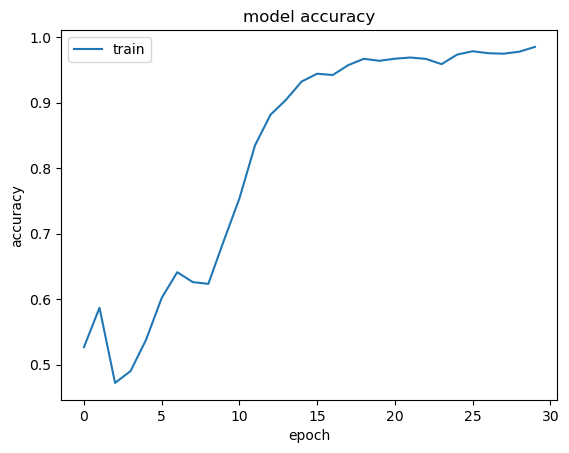

In [11]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    #plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()


plot_hist(hist)

In [16]:
# ... (your code for model creation and compilation)

# Get the EfficientNet-B0 layer from the model
efficientnet_layer = model.get_layer("efficientnetb0")

# Collect layer information
layer_info = []
for layer in efficientnet_layer.layers:
    layer_info.append((layer.name, str(layer.output_shape)))

# Determine the maximum length for each column
max_name_length = max(len(name) for name, _ in layer_info)
max_shape_length = max(len(shape) for _, shape in layer_info)

# Print table headers
header = f"{'Layer Name':<{max_name_length}} | {'Output Shape':<{max_shape_length}}"
print(header)
print("-" * (max_name_length + max_shape_length + 3))

# Print layer information in table format
for name, shape in layer_info:
    row = f"{name:<{max_name_length}} | {shape:<{max_shape_length}}"
    print(row)


Layer Name                | Output Shape         
-------------------------------------------------
input_2                   | [(None, 224, 224, 3)]
rescaling                 | (None, 224, 224, 3)  
normalization             | (None, 224, 224, 3)  
stem_conv_pad             | (None, 225, 225, 3)  
stem_conv                 | (None, 112, 112, 32) 
stem_bn                   | (None, 112, 112, 32) 
stem_activation           | (None, 112, 112, 32) 
block1a_dwconv            | (None, 112, 112, 32) 
block1a_bn                | (None, 112, 112, 32) 
block1a_activation        | (None, 112, 112, 32) 
block1a_se_squeeze        | (None, 32)           
block1a_se_reshape        | (None, 1, 1, 32)     
block1a_se_reduce         | (None, 1, 1, 8)      
block1a_se_expand         | (None, 1, 1, 32)     
block1a_se_excite         | (None, 112, 112, 32) 
block1a_project_conv      | (None, 112, 112, 16) 
block1a_project_bn        | (None, 112, 112, 16) 
block2a_expand_conv       | (None, 112, 112, 96) 


# Check the Accuracy of the Model 

In [12]:
preds = model.evaluate(test_x, test_y)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

59/59 [==============================] - 123s 2s/step - loss: 0.2775 - accuracy: 0.9275
Loss = 0.277536541223526
Test Accuracy = 0.9274666905403137
